## Import libs and data

In [35]:
import pandas as pd
import re
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm, tqdm_notebook, trange
tqdm.pandas()
import pickle
import squarify

In [36]:
df_user_x_cat = pd.read_csv('../src/pantip_user_cat.csv')

In [37]:
df_user_x_cat.head()

,user_id,category,post_date
0,4179868,travel,2018-12-06 21:31:06
1,2897151,travel,2018-12-06 21:19:04
2,772076,travel,2018-12-06 20:52:07
3,4977690,travel,2018-12-06 20:24:25
4,2239672,travel,2018-12-06 20:03:01


In [38]:
df_user_x_cat.category.nunique()

5915

In [5]:
# select top 500 most popular categories
from collections import Counter

cat_counter = Counter(df_user_x_cat.category.values)

In [7]:
cat_counter

Counter({'travel': 275829,
         'auto': 249045,
         'pantip_food': 141532,
         'pantip_cartoon': 117749,
         'pantip_chalermthai': 217837,
         'pantip_chalermkrung': 167921,
         'pantip_korea': 29165,
         'pantip_gadget': 3891,
         'pantip_siliconvalley': 347787,
         'pantip_family': 102846,
         'pantip_rajdumnern': 244131,
         'pantip_social': 134897,
         'pantip_klaibann': 48358,
         'pantip_home': 160106,
         'pantip_tvshow': 231820,
         'pantip_region': 40217,
         'pantip_mbk': 558385,
         'pantip_supachalasai': 307599,
         'pantip_lumpini': 209281,
         'pantip_sinthorn': 391711,
         'pantip_wahkor': 82985,
         'pantip_library': 117852,
         'pantip_siam': 404693,
         'pantip_cartoon, pantip_chalermthai': 11005,
         'pantip_social, pantip_beauty': 3376,
         'pantip_chalermthai, pantip_family': 3532,
         'pantip_siliconvalley, pantip_mbk': 50677,
         '

## create tags set and prepare dataframe

In [39]:
# create list of tags
tag_list=[]
for text in df_user_x_cat.category:
    tag_list.append(text.split(', '))

all_tags = []
for tl in tag_list:
    for tag in tl:
        if not tag in all_tags:
            all_tags.append(tag)

In [40]:
all_tags

['travel',
 'auto',
 'pantip_food',
 'pantip_cartoon',
 'pantip_chalermthai',
 'pantip_chalermkrung',
 'pantip_korea',
 'pantip_gadget',
 'pantip_siliconvalley',
 'pantip_family',
 'pantip_rajdumnern',
 'pantip_social',
 'pantip_klaibann',
 'pantip_home',
 'pantip_tvshow',
 'pantip_region',
 'pantip_mbk',
 'pantip_supachalasai',
 'pantip_lumpini',
 'pantip_sinthorn',
 'pantip_wahkor',
 'pantip_library',
 'pantip_siam',
 'pantip_beauty',
 'pantip_bangrak']

In [6]:
df_tags = pd.DataFrame(np.zeros((len(tag_list),len(all_tags))),columns=all_tags)

for i in tqdm_notebook(range(len(tag_list))):
    for tag in tag_list[i]:
        df_tags.loc[i,tag] = 1

df_tags['user_id'] = df_user_x_cat.user_id.values

df_tags.to_csv('../tmp/df_tags.csv',index=False)

In [41]:
df_tags = pd.read_csv('../tmp/df_tags.csv')

In [42]:
df_user_segment = df_tags.groupby('user_id').sum()
df_user_segment.head()

,travel,auto,pantip_food,pantip_cartoon,pantip_chalermthai,pantip_chalermkrung,pantip_korea,pantip_gadget,pantip_siliconvalley,pantip_family,pantip_rajdumnern,pantip_social,pantip_klaibann,pantip_home,pantip_tvshow,pantip_region,pantip_mbk,pantip_supachalasai,pantip_lumpini,pantip_sinthorn,pantip_wahkor,pantip_library,pantip_siam,pantip_beauty,pantip_bangrak
user_id,,,,,,,,,,,,,,,,,,,,,,,,,
4,3.0,0.0,4.0,3.0,2.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
101,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,92.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0


In [43]:
df_user_segment = df_user_segment.div(df_user_segment.sum(axis=1), axis=0)

## Performing segmentation

In [44]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
user_segment_sc = sc.fit_transform(df_user_segment)

In [45]:
from sklearn.cluster import KMeans

k_model = KMeans(n_clusters=7)

segment = k_model.fit_predict(user_segment_sc)

df_user_segment['segment_id'] = segment

# summary statistic by segment
df_segment = df_user_segment.groupby('segment_id')[all_tags].mean()

df_user_segment.reset_index(inplace=True)

df_segment = df_segment.join(df_user_segment.groupby('segment_id')['user_id'].count()).rename({'user_id':'total_user'},axis=1)

In [46]:
df_segment

,travel,auto,pantip_food,pantip_cartoon,pantip_chalermthai,pantip_chalermkrung,pantip_korea,pantip_gadget,pantip_siliconvalley,pantip_family,pantip_rajdumnern,pantip_social,pantip_klaibann,pantip_home,pantip_tvshow,pantip_region,pantip_mbk,pantip_supachalasai,pantip_lumpini,pantip_sinthorn,pantip_wahkor,pantip_library,pantip_siam,pantip_beauty,pantip_bangrak,total_user
segment_id,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.012902,0.010197,0.007434,0.003376,0.004228,0.012054,0.001249,0.000487,0.015658,0.150849,0.000522,0.196087,0.011940,0.005626,0.002276,0.005226,0.009522,0.002110,0.034667,0.006853,0.001751,0.007097,0.186112,0.002955,0.308822,24305
1,0.469356,0.038315,0.016162,0.002094,0.005944,0.007790,0.002688,0.000353,0.009707,0.013032,0.000921,0.013211,0.186057,0.009129,0.098122,0.043659,0.016341,0.003756,0.010727,0.009901,0.002374,0.014502,0.020771,0.004449,0.000637,112719
2,0.005048,0.004374,0.003630,0.002797,0.003218,0.111788,0.003626,0.000173,0.009528,0.124565,0.000426,0.045290,0.004038,0.002874,0.006812,0.012403,0.008628,0.002567,0.020595,0.003434,0.003531,0.047356,0.569415,0.000819,0.003066,256472
3,0.017939,0.020142,0.045075,0.036456,0.040458,0.014076,0.012076,0.003644,0.154956,0.014236,0.003124,0.105162,0.005147,0.070105,0.009772,0.040806,0.181545,0.007647,0.023868,0.075809,0.026647,0.058501,0.025407,0.006039,0.001366,518871
4,0.006601,0.011986,0.003498,0.002015,0.005871,0.003540,0.000051,0.000041,0.008995,0.002893,0.852006,0.019820,0.001428,0.006174,0.002517,0.005221,0.012933,0.011882,0.005263,0.017612,0.007534,0.007627,0.004249,0.000115,0.000129,11854
5,0.005929,0.006668,0.007896,0.002126,0.002623,0.005280,0.000872,0.000567,0.009536,0.035104,0.000219,0.032157,0.000895,0.004775,0.002108,0.006479,0.012097,0.005963,0.794881,0.005300,0.004348,0.007559,0.045234,0.001076,0.000306,63618
6,0.014367,0.542457,0.005406,0.002702,0.005440,0.006382,0.000427,0.001499,0.017560,0.005010,0.002711,0.023479,0.001803,0.011810,0.005786,0.014937,0.023156,0.238754,0.029241,0.023015,0.005268,0.004960,0.013088,0.000470,0.000270,76588


In [48]:
df_user_segment.to_csv('../out/df_segment.csv',index=False)
df_segment.to_csv('../out/df_segment.csv')

In [49]:
df_segment = pd.read_csv('../out/df_segment.csv')
df_segment.set_index('segment_id',inplace=True)

In [50]:
segment_lst = df_segment.columns[:-1]

# find top 3 traits for each segment
seg_character = []
for seg_id in df_segment.index:
    seg_dict = dict()
    top_3 = np.argsort(df_segment.loc[seg_id].values[:-1])[-3:]
    for i in range(2, -1,-1):
        seg_dict[segment_lst[top_3[i]]] = df_segment.loc[seg_id].values[top_3[i]]
    seg_character.append(seg_dict)

In [52]:
seg_character

[{'pantip_bangrak': 0.30882198854614457,
  'pantip_social': 0.19608686186196486,
  'pantip_siam': 0.1861119393695218},
 {'travel': 0.469356463822884,
  'pantip_klaibann': 0.18605666929852055,
  'pantip_tvshow': 0.09812185266995704},
 {'pantip_siam': 0.5694148283078199,
  'pantip_family': 0.12456502111754746,
  'pantip_chalermkrung': 0.11178763131030728},
 {'pantip_mbk': 0.1815447141046995,
  'pantip_siliconvalley': 0.15495558763571896,
  'pantip_social': 0.10516212615030616},
 {'pantip_rajdumnern': 0.8520062328862485,
  'pantip_social': 0.019819990304054253,
  'pantip_sinthorn': 0.017611518402044727},
 {'pantip_lumpini': 0.79488121026979,
  'pantip_siam': 0.045234298337760284,
  'pantip_family': 0.03510402190795007},
 {'auto': 0.5424569217923096,
  'pantip_supachalasai': 0.23875411545735745,
  'pantip_lumpini': 0.029241005460623463}]

In [ ]:
# อยากรู้ interest แต่ละกลุ่ม=>use word features + เปลัียนไฟล์ pos neg + แก้ code ให้ flexible กับ input file
# เพิ่ม ระยะ + clean html tag

## Summarize segmentation per keyword

In [ ]:
# create user-segment mapper
user_x_segment = dict()
for i in range(len(df_user_segment)):
    user_x_segment[df_user_segment.iloc[i]['user_id']] = df_user_segment.iloc[i]['segment_id']

In [69]:
with open('../out/user_x_segment.pkl', 'wb') as fp:
    pickle.dump(user_x_segment,fp)

In [ ]:
with open('../out/user_x_segment.pkl', 'rb') as fp:
    user_x_segment = pickle.load(fp)

In [9]:
# import car segment data
# import tokens
df_post = pd.read_csv('../out/df_post.csv')
with open('../out/tokens_post.txt', 'rb') as fp:   #Un-pickling
    tokens_post = pickle.load(fp)

total unique user: 765


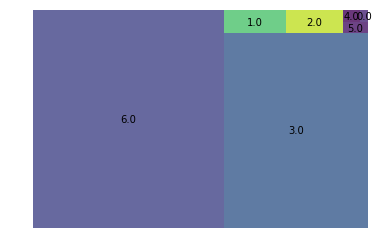

In [73]:
# visualize user segment per keyword
kws = ['yamaha']

idxs=[]
for i,tkn in enumerate(tokens_post):
    for kw in kws:
        if kw in tkn:
            idxs.append(i)
            break
            
df_temp = df_post.iloc[idxs]

unique_user = df_temp.user_id.unique()

print('total unique user:',len(unique_user))

corr_seg = []
for user in unique_user:
    corr_seg.append(user_x_segment[user])

df_prod_seg = pd.DataFrame({'user_id':unique_user,'segment_id':corr_seg})

squarify.plot(sizes=df_prod_seg.segment_id.value_counts().values, label=df_prod_seg.segment_id.value_counts().index, alpha=.8 )
_=plt.axis('off')

In [62]:
# segmentation x 2d metrics i.e. sentiment score, total post